/Users/sreeram/opt/anaconda3/envs/pytorchenv/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/Users/sreeram/opt/anaconda3/envs/pytorchenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


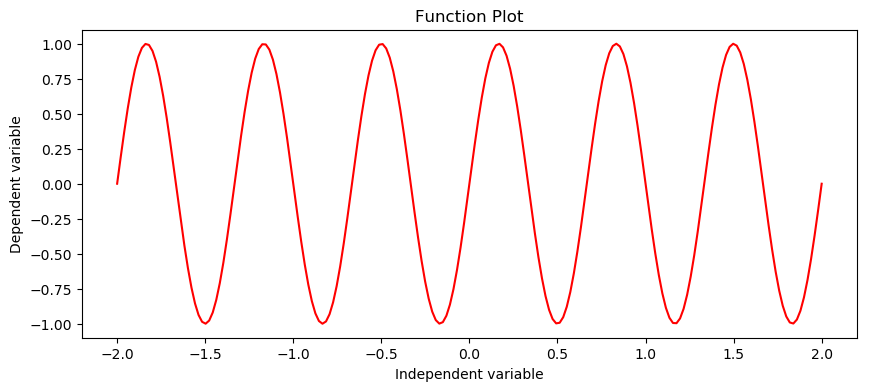

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math

# Setting a seed for reproducibility
torch.manual_seed(0)

# Generating the x data
x = torch.unsqueeze(torch.linspace(-2, 2, 200), dim=1)  # x data (tensor), shape=(300, 1)

# Generating the y data
y = np.sin(3*np.pi*x)

# Converting x and y to PyTorch tensors
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Plotting the function
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.savefig('functionplot.png')

plt.show()

# Getting the number of samples and number of features
n_samples, n_features = x.shape


In [2]:
class M1(torch.nn.Module):
    def __init__(self):
        # Inherit the properties of the torch.nn.Module parent class
        super(M1, self).__init__()
        
        # Define the hidden layer
        self.hidden1 = torch.nn.Linear(1, 5)   
        self.hidden2 = torch.nn.Linear(5, 10)
        self.hidden3 = torch.nn.Linear (10, 10)
        self.hidden4 = torch.nn.Linear (10, 10)
        self.hidden5 = torch.nn.Linear (10, 10)
        self.hidden6 = torch.nn.Linear (10, 10)
        self.hidden7 = torch.nn.Linear (10,5)
        
        # Define the output layer
        self.predict = torch.nn.Linear(5, 1)   
        
    def forward(self, x):
        # Apply the activation function for the hidden layer
        x = F.leaky_relu(self.hidden1(x))
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.leaky_relu(self.hidden4(x))
        x = F.leaky_relu(self.hidden5(x))
        x = F.leaky_relu(self.hidden6(x))
        x = F.leaky_relu(self.hidden7(x))
        
        # Return the linear output
        x = self.predict(x)                    
        return x

# Define the network
m1 = M1()

# Define the optimizer, using Adam
optimizer = torch.optim.Adam(m1.parameters(), lr=0.0012, weight_decay = 1e-4)

# Define the loss function, using mean squared error
loss_func = torch.nn.MSELoss()  

# Calculate the total number of parameters in the network
a = []
for i in m1.parameters():
    a.append(torch.numel(i))
print('number of parameters in Model 1 =', np.sum(a))

# Print the weight and bias of the network before training
print("weight and bias before training for model 1\n")
for param in m1.state_dict():
    print(param, "\t",m1.state_dict()[param])


number of parameters in Model 1 = 571
weight and bias before training for model 1

hidden1.weight 	 tensor([[-0.0075],
        [ 0.5364],
        [-0.8230],
        [-0.7359],
        [-0.3852]])
hidden1.bias 	 tensor([ 0.2682, -0.0198,  0.7929, -0.0887,  0.2646])
hidden2.weight 	 tensor([[-0.1352, -0.0879, -0.4272, -0.2962, -0.1844],
        [ 0.0166,  0.1768,  0.2683, -0.3032, -0.1947],
        [ 0.1624,  0.3714, -0.0920,  0.3347, -0.0721],
        [ 0.0473,  0.4049, -0.4149, -0.2815, -0.1132],
        [-0.1743,  0.3864, -0.2899, -0.2059, -0.3124],
        [-0.4188, -0.2611,  0.3844,  0.1996,  0.2168],
        [ 0.0235, -0.2293,  0.0757, -0.4176, -0.3231],
        [-0.2306,  0.2822,  0.2622, -0.1983, -0.0161],
        [ 0.2860,  0.4446,  0.1775,  0.0604,  0.2999],
        [-0.2633,  0.0833, -0.3467, -0.3100, -0.2310]])
hidden2.bias 	 tensor([ 0.2024,  0.1799, -0.2649,  0.1351,  0.2455, -0.0564,  0.0171,  0.1036,
         0.2774,  0.4294])
hidden3.weight 	 tensor([[-0.2437, -0.1159,  

In [3]:
def trainFunc(model, x, y):
    model.train() # set the model in training mode

    max_epoch = 25000 # maximum number of epochs
    epoch_arr, loss_arr = [], [] # arrays to store the number of epochs and the corresponding loss values

    not_converged = True # flag to check if the model has converged
    epoch = 0
    
    # while loop to train the model until either the maximum number of epochs is reached or the model has converged
    while not_converged:
        epoch += 1
        prediction = model(x) # input x and predict based on x
        loss = loss_func(prediction, y) # calculate the loss using the predicted values and actual values
        optimizer.zero_grad() # clear gradients for the next iteration
        loss.backward() # backpropagation, compute gradients
        optimizer.step() # update the model parameters based on the calculated gradients

        epoch_arr.append(epoch) # store the current epoch number
        loss_arr.append(loss.detach().numpy()) # store the current loss value

        # print the loss after every 100 epochs
        if epoch % 100 == 0:
            print(f'epoch: {epoch}, loss = {loss.item():.4f}', end='\r', flush=True)
        
        # check if the maximum number of epochs has been reached
        if epoch == max_epoch:
            print("Max Epoch Reached")
            not_converged = False
        # check if the model has converged
        elif (epoch > 5) and (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print(f"Convergence reached for loss:{loss_arr[-1]:.4f} at epoch: {epoch}")
                not_converged = False
                
    return epoch_arr, loss_arr, prediction # return the epoch number, loss values, and final prediction



In [4]:
M1epoch_arr,M1loss_arr,M1prediction = trainFunc(m1,x,y)

Convergence reached for loss:0.0010 at epoch: 8675


In [5]:
# Print the weights and biases of model 1 after training
print("\nModel 1 weight and bias after training\n")

# Loop through the parameters in the model's state dictionary
for param in m1.state_dict():
    # Print the name of the parameter and its value
    print(param, "\t",m1.state_dict()[param])



Model 1 weight and bias after training

hidden1.weight 	 tensor([[ 0.4964],
        [ 0.9911],
        [-0.9214],
        [-1.0106],
        [-1.0889]])
hidden1.bias 	 tensor([ 0.7536, -0.0358,  1.0604,  0.0885,  0.1003])
hidden2.weight 	 tensor([[ 0.5186, -0.1649, -0.3639, -1.0836, -0.6522],
        [-0.1912,  0.0275,  0.4155, -0.4614, -0.1476],
        [ 0.3786,  0.6914, -0.2795, -0.1256, -0.3720],
        [ 0.2750,  1.0323, -0.0569, -0.1642, -0.6366],
        [-0.1189,  0.3910, -0.9503,  0.1519,  0.1263],
        [-0.4609,  0.1699,  0.6719,  0.3927,  0.6945],
        [-0.0164, -0.3238,  0.1855, -0.3364, -0.2695],
        [-0.4771,  0.5325,  0.4791, -0.3962,  0.0653],
        [-0.3815,  0.5430,  0.1870, -0.2511,  0.3976],
        [ 0.1962,  0.8520, -0.2134, -0.2244, -0.6891]])
hidden2.bias 	 tensor([ 0.7124,  0.2718,  0.0396, -0.1148,  0.1298, -0.2818,  0.0773, -0.0474,
        -0.2041,  0.0739])
hidden3.weight 	 tensor([[-0.7014, -0.0615,  0.0559,  0.0576,  0.0081,  0.4554, -0.0648

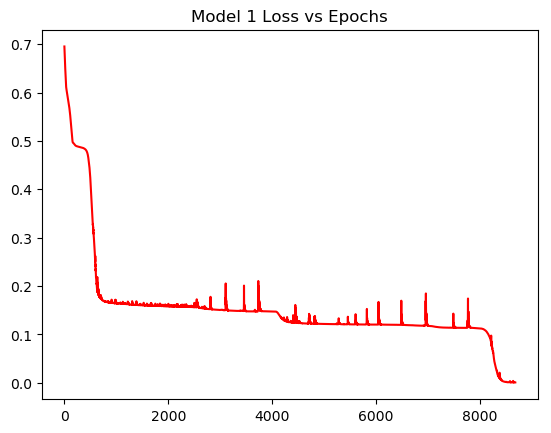

In [6]:
# Plotting loss vs epochs for Model 1
plt.plot(M1epoch_arr, M1loss_arr, color="red")
# Adding title to the plot
plt.title('Model 1 Loss vs Epochs')
# Displaying the plot
plt.show()


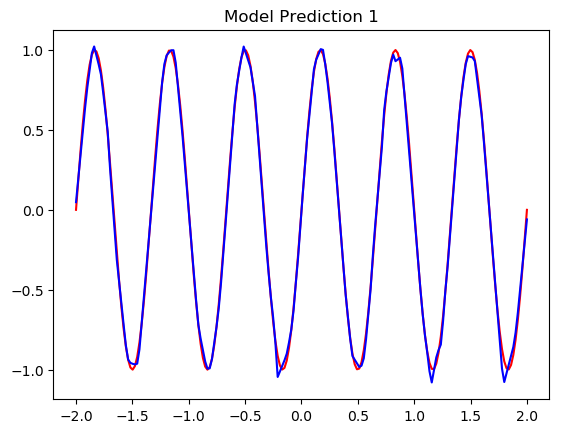

In [7]:
#plot for model1 prediction
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,M1prediction.data.numpy(),color="blue")
plt.title('Model Prediction 1')
plt.show()

In [8]:
# Define the network structure for Model 2
class M2(torch.nn.Module):
    def __init__(self,):
        super(M2, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 10)   # First hidden layer with 1 input and 10 outputs
        self.hidden2 = torch.nn.Linear (10, 18) # Second hidden layer with 10 inputs and 18 outputs
        self.hidden3 = torch.nn.Linear (18, 15) # Third hidden layer with 18 inputs and 15 outputs
        self.hidden4 = torch.nn.Linear (15, 4)  # Fourth hidden layer with 15 inputs and 4 outputs
        self.predict = torch.nn.Linear(4, 1)    # Output layer with 4 inputs and 1 output
        #self.activation = nn.LeakyReLU()
        
    # Define the forward pass of the network
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # Apply the activation function (Leaky ReLU) to the output of first hidden layer
        x = F.leaky_relu(self.hidden2(x))      # Apply the activation function (Leaky ReLU) to the output of second hidden layer
        x = F.leaky_relu(self.hidden3(x))      # Apply the activation function (Leaky ReLU) to the output of third hidden layer
        x = F.leaky_relu(self.hidden4(x))      # Apply the activation function (Leaky ReLU) to the output of fourth hidden layer
        x = self.predict(x)                    # Calculate the linear output
        return x

# Create an instance of the Model 2 class
m2 = M2()

# Define the optimizer for Model 2
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(m2.parameters(), lr=0.0012, weight_decay = 1e-4)

# Define the loss function for Model 2
loss_func = torch.nn.MSELoss()  # Mean Squared Loss for regression

# Calculate the total number of parameters in Model 2
a=[]
for i in m2.parameters():
    a.append(torch.numel(i))
print('no of parameters in Model 2:', np.sum(a))


# Print the weights and biases of Model 2 before training
print("weight and bias before training for model 1\n")
for param in m2.state_dict():
    print(param, "\t",m2.state_dict()[param])


no of parameters in Model 2: 572
weight and bias before training for model 1

hidden1.weight 	 tensor([[ 0.5784],
        [-0.3034],
        [-0.6635],
        [-0.0744],
        [ 0.8276],
        [-0.3356],
        [-0.9274],
        [ 0.4099],
        [ 0.9735],
        [-0.2847]])
hidden1.bias 	 tensor([-0.8280, -0.9071,  0.2506, -0.0757, -0.5050,  0.2021,  0.3798,  0.7953,
         0.7764, -0.1497])
hidden2.weight 	 tensor([[-2.7884e-01, -2.8575e-01,  2.9526e-01,  1.3979e-01,  1.3785e-01,
         -2.7361e-01,  2.9283e-01,  2.9958e-01,  2.8551e-01, -2.6676e-01],
        [-1.1932e-01, -2.1749e-01,  2.9946e-01, -1.3588e-01, -1.4438e-01,
          1.6568e-01, -1.4628e-01, -1.5575e-01, -2.7661e-02, -3.0396e-02],
        [-2.4633e-01,  2.6363e-01, -1.3949e-01,  1.1217e-01,  2.7505e-01,
          1.5948e-01,  4.4771e-02,  2.6906e-01,  4.2509e-02, -1.4630e-01],
        [ 2.9915e-01,  7.4845e-02, -3.0854e-01, -9.0027e-02, -2.1540e-01,
          2.7725e-01, -5.2224e-02, -2.8825e-01, -1.987

In [9]:
M2epoch_arr,M2loss_arr,M2prediction = trainFunc(m2,x,y)

Convergence reached for loss:0.0009 at epoch: 3386


In [10]:
# Printing the weights and bias of Model 2 after training
print("\nModel 2 weight and bias after training\n")
for param in m2.state_dict():
    print(param, "\t",m2.state_dict()[param])



Model 2 weight and bias after training

hidden1.weight 	 tensor([[ 0.8269],
        [ 0.0667],
        [-0.9442],
        [-0.5794],
        [ 1.0256],
        [-0.7233],
        [-1.1749],
        [ 0.7164],
        [ 1.3342],
        [-0.7126]])
hidden1.bias 	 tensor([-1.2808, -0.1072,  0.3978, -0.1080, -0.7731,  0.3453,  0.6253,  1.2835,
         1.0019, -0.3443])
hidden2.weight 	 tensor([[-1.8407e-01, -3.6358e-03,  2.8472e-01,  3.9877e-01,  1.4974e-01,
         -2.6989e-01,  2.8636e-01,  2.4891e-01,  4.9067e-01, -5.1409e-01],
        [-1.8221e-01, -1.3647e-02,  3.1584e-01,  1.3143e-02, -1.1813e-01,
          1.5655e-01, -1.2704e-01,  6.5268e-02, -2.9104e-01,  4.3975e-02],
        [-1.4695e-01, -1.3649e-02, -1.0492e-01,  3.8660e-01,  3.4004e-01,
          1.5915e-01,  6.1556e-02,  3.9601e-01,  2.2318e-01, -2.3164e-01],
        [ 2.7329e-02,  1.6179e-04, -1.5982e-01,  2.6150e-01, -4.0694e-02,
          3.5771e-01,  7.6407e-02, -8.8536e-01,  2.4131e-02,  7.4376e-01],
        [-2.6021

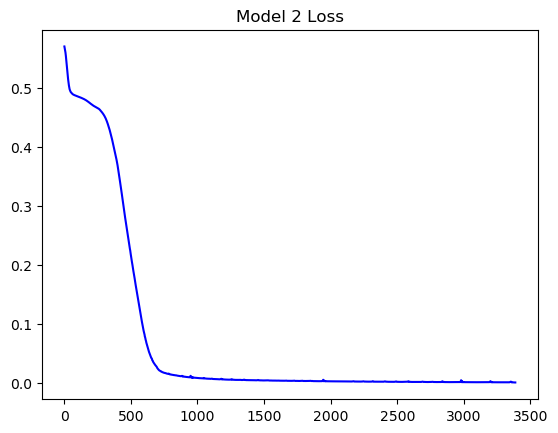

In [11]:
# Plotting Loss Curve for Model 2
plt.plot(M2epoch_arr, M2loss_arr, color="blue")
plt.title('Model 2 Loss')
plt.show()


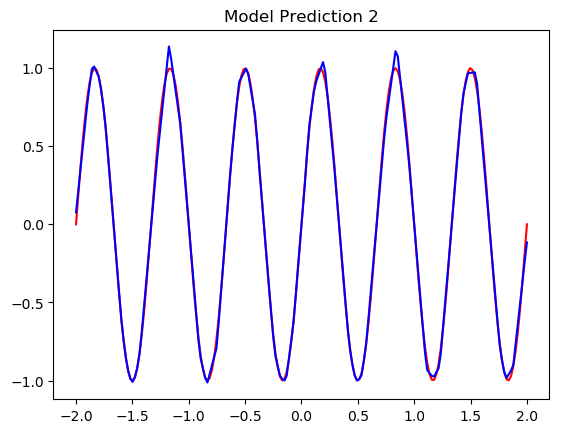

In [12]:
# Ploting the model 2 prediction
plt.plot(x.numpy(), y.numpy(), color="red")
plt.plot(x, M2prediction.data.numpy(), color="blue")
plt.title('Model Prediction 2')
plt.show()



In [13]:
class M3(torch.nn.Module):
    def __init__(self,):
        super(M3, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 190)   # define the first linear layer with input size 1 and output size 190
        self.predict = torch.nn.Linear(190, 1)   # define the second linear layer with input size 190 and output size 1
        #self.activation = nn.LeakyReLU()
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # apply the activation function to the output of the first linear layer
        x = self.predict(x)                    # pass the output of the activation function to the second linear layer
        return x

m3 = M3()     # create an instance of the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(m3.parameters(), lr=0.0011, weight_decay = 1e-4)  # define the optimizer with learning rate 0.0011 and weight decay of 1e-4
loss_func = torch.nn.MSELoss()  # define the loss function as mean squared error loss for regression problems

a=[]
for i in m3.parameters():
    a.append(torch.numel(i))
print('no of parameters in Model 3:', np.sum(a))  # print the total number of parameters in the network


#Getting weights & bias
print("weight and bias before training for model 3\n")
for param in m3.state_dict():
    print(param, "\t",m3.state_dict()[param])  # print the weight and bias values before training


no of parameters in Model 3: 571
weight and bias before training for model 3

hidden1.weight 	 tensor([[-0.5081],
        [ 0.4833],
        [-0.9582],
        [ 0.2370],
        [-0.7742],
        [ 0.4971],
        [-0.8550],
        [ 0.6148],
        [-0.9466],
        [-0.8406],
        [ 0.0147],
        [ 0.7880],
        [-0.8564],
        [-0.4461],
        [ 0.8783],
        [-0.1677],
        [ 0.4143],
        [-0.9620],
        [-0.3145],
        [-0.5078],
        [ 0.8431],
        [ 0.4150],
        [-0.7297],
        [ 0.1612],
        [-0.0115],
        [-0.4109],
        [-0.5711],
        [-0.3318],
        [ 0.7882],
        [-0.7169],
        [-0.7123],
        [-0.3085],
        [ 0.0174],
        [ 0.2722],
        [ 0.0300],
        [-0.2407],
        [-0.6064],
        [-0.1794],
        [-0.4026],
        [ 0.8079],
        [-0.9734],
        [-0.6379],
        [-0.8136],
        [-0.1828],
        [ 0.7793],
        [ 0.8765],
        [-0.8706],
        [-0.

In [14]:
M3epoch_arr,M3loss_arr,M3prediction = trainFunc(m3,x,y)

Max Epoch Reacheds = 0.0024


In [15]:
# Get the weights and biases of Model 3 before training
print("\nModel 3 weight and bias before training\n")
for param in m3.state_dict():
    print(param, "\t", m3.state_dict()[param])  # print the name of the weight or bias and its value



Model 3 weight and bias before training

hidden1.weight 	 tensor([[-5.0291e-01],
        [ 1.4935e+00],
        [-1.2935e+00],
        [ 4.2253e-01],
        [-1.6832e+00],
        [ 1.1612e+00],
        [-9.9387e-01],
        [ 1.4953e+00],
        [-1.1487e+00],
        [-9.9469e-01],
        [ 1.7486e-17],
        [ 1.6401e+00],
        [-1.2316e+00],
        [-6.5727e-01],
        [ 1.1563e+00],
        [-6.2674e-01],
        [ 3.1209e-01],
        [-1.2355e+00],
        [-8.7228e-38],
        [-5.5266e-01],
        [ 8.6574e-01],
        [ 1.3268e+00],
        [-7.2214e-01],
        [ 1.9387e-01],
        [-2.9883e-08],
        [-4.7687e-01],
        [-5.8880e-01],
        [-6.1337e-01],
        [ 6.6870e-01],
        [-1.1393e+00],
        [-5.2858e-01],
        [-5.1094e-01],
        [-5.5937e-40],
        [ 4.1789e-01],
        [-2.9067e-01],
        [-9.0820e-40],
        [-6.7001e-01],
        [-3.7166e-07],
        [-4.6400e-01],
        [ 1.3515e+00],
        [-7.2278e-01]

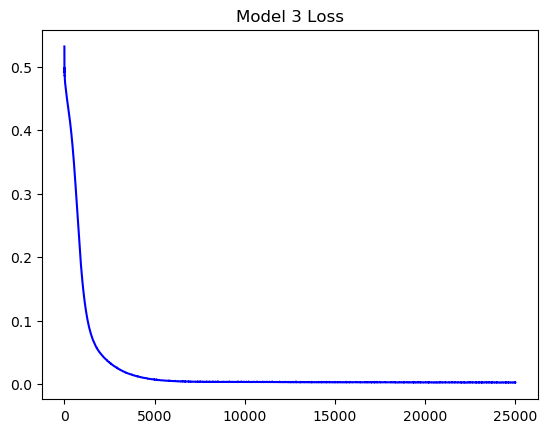

In [16]:
# plot the loss curve for Model 3
plt.plot(M3epoch_arr, M3loss_arr, color="blue")  # plot the values in M3epoch_arr and M3loss_arr on the x and y axis respectively
plt.title('Model 3 Loss')  # set the title of the plot as "Model 3 Loss"
plt.show()  # show the plot


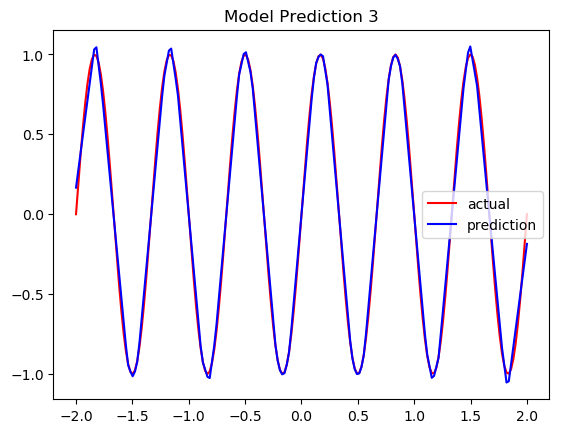

In [17]:
# Plot the actual vs predicted values using Model 3
plt.plot(x.numpy(), y.numpy(), color="red", label="actual")  # plot the actual values using black color
plt.plot(x, M3prediction.data.numpy(), color="blue", label="prediction")  # plot the predicted values using yellow color
plt.title('Model Prediction 3')  # set the title of the plot as "Model Prediction 3"
plt.legend()  # display the legend
plt.show()  # show the plot


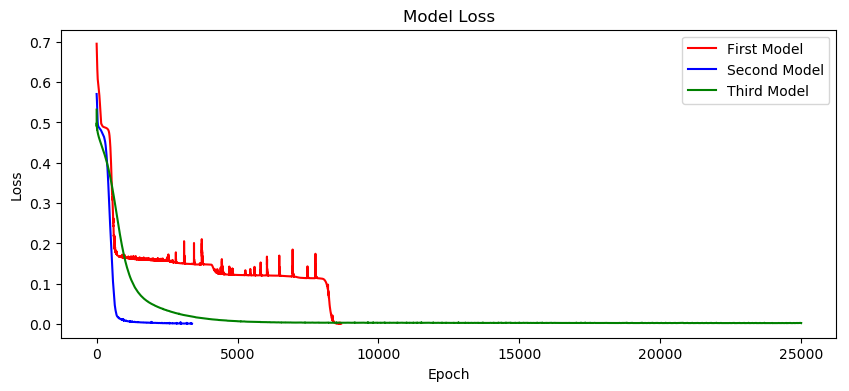

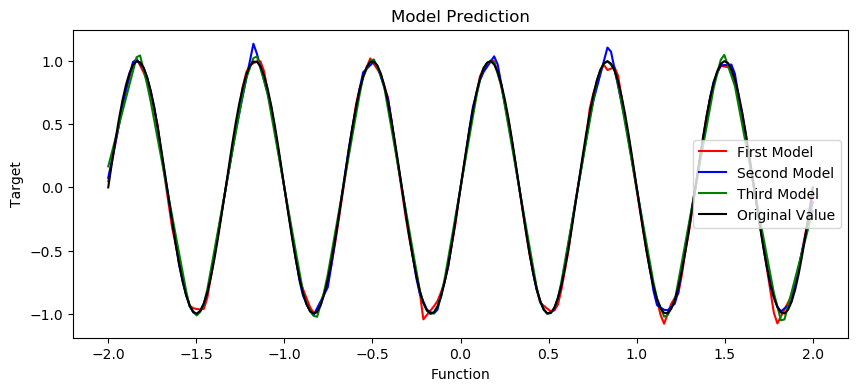

In [18]:
# Plot the loss curve for all three models
plt.figure(figsize=(10, 4))  # set the size of the figure
plt.plot(M1epoch_arr, M1loss_arr, color="red", label="First Model")  # plot the loss curve for the first model in red color
plt.plot(M2epoch_arr, M2loss_arr, color="blue", label="Second Model")  # plot the loss curve for the second model in blue color
plt.plot(M3epoch_arr, M3loss_arr, color="green", label="Third Model")  # plot the loss curve for the third model in green color
plt.title('Model Loss')  # set the title of the plot as "Model Loss"
plt.legend()  # display the legend
plt.xlabel('Epoch')  # set the x-axis label as "Epoch"
plt.ylabel('Loss')  # set the y-axis label as "Loss"
plt.savefig('EpochVSLoss.png')  # save the plot as an image with the file name "EpochVSLoss.png"
plt.show()  # show the plot

# Plot the predicted vs actual values for all three models
plt.figure(figsize=(10, 4))  # set the size of the figure
plt.plot(x, M1prediction.data.numpy(), color="red", label="First Model")  # plot the predicted values of the first model in red color
plt.plot(x, M2prediction.data.numpy(), color="blue", label="Second Model")  # plot the predicted values of the second model in blue color
plt.plot(x, M3prediction.data.numpy(), color="green", label="Third Model")  # plot the predicted values of the third model in green color
plt.plot(x, y.numpy(), color="black", label="Original Value")  # plot the actual values in black color
plt.title('Model Prediction')  # set the title of the plot as "Model Prediction"
plt.legend()  # display the legend
plt.xlabel('Function')  # set the x-axis label as "Function"
plt.ylabel('Target')  # set the y-axis label as "Target"
plt.savefig('Model_Prediction.png')  # save the plot as an image with the file name "Model_Prediction.png"
plt.show()  # show the plot


Xshape: torch.Size([200, 1]) 
 Yshape: torch.Size([200, 1])


/Users/sreeram/opt/anaconda3/envs/pytorchenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


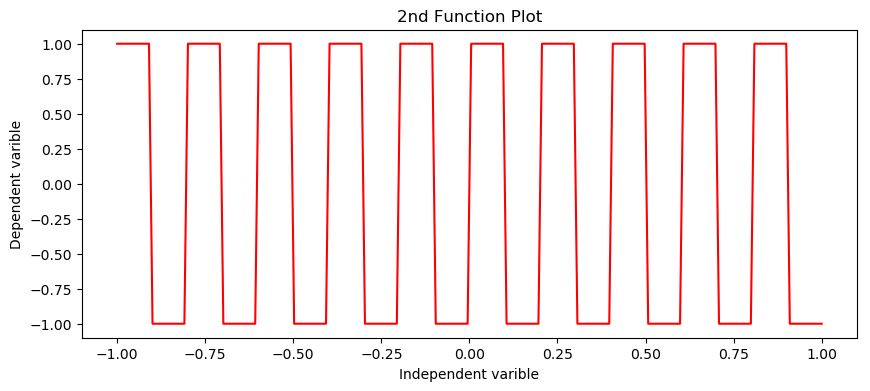

In [19]:
#2nd Function
#Creating the data

torch.manual_seed(1) 
x2 = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1)  # x data (tensor), shape=(300, 1)
y2 = np.sign(np.sin(5*np.pi*x)) #non-linear y function
#y = (np.cos(7 * x * np.pi))

#Printing shape of the data
print('Xshape:',x.shape,"\n Yshape:",y.shape)

#Converting data into PyTorch tensors
x2, y2 = torch.tensor(x2, dtype=torch.float32), torch.tensor(y2, dtype=torch.float32)

#Plotting the function
plt.figure(figsize=(10,4))
plt.plot(x2, y2, color = "red")
plt.title('2nd Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('funcplt.png')

#Displaying the plot
plt.show()

#Getting number of samples and number of features
n_samples, n_features = x2.shape


In [20]:
# Re-initialize the network
f2m1 = M1()     

# Define the optimizer with learning rate of 0.009 and weight decay of 1e-4
optimizer = torch.optim.Adam(f2m1.parameters(), lr=0.009, weight_decay = 1e-4)

# Define the loss function as mean squared error loss
loss_func = torch.nn.MSELoss()  

# Train the network and obtain the results
F2M1epoch_arr,F2M1loss_arr,F2M1prediction = trainFunc(f2m1,x2,y2)

Convergence reached for loss:0.0009 at epoch: 10334


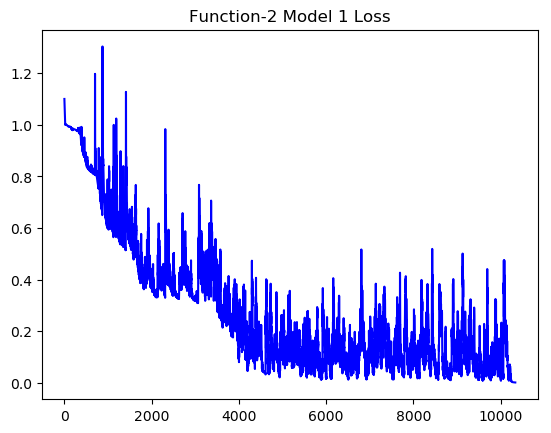

In [21]:
#plot
plt.plot(F2M1epoch_arr,F2M1loss_arr,color="blue")
plt.title('Function-2 Model 1 Loss')
plt.show()


In [22]:
# Printing weights and bias of the model after training for Function-2 (F2)
print("\nModel 1 weight and bias after training for F2\n")
# Iterating through the parameters (weights and bias) in the state_dict of the model
for param in f2m1.state_dict():
    # Printing the name of the parameter and its value
    print(param, "\t",f2m1.state_dict()[param])



Model 1 weight and bias after training for F2

hidden1.weight 	 tensor([[ 0.8980],
        [-0.6811],
        [ 1.2830],
        [ 1.5324],
        [-0.9970]])
hidden1.bias 	 tensor([ 0.6423, -0.0481,  0.1744, -0.4430, -0.1945])
hidden2.weight 	 tensor([[ 0.4720, -0.4705, -0.0639,  0.2125, -0.0517],
        [ 0.2880,  0.1681, -0.0975,  0.3563,  0.2700],
        [ 0.9507, -0.5044, -2.5400, -0.4525, -1.1718],
        [ 0.6472, -0.2801, -0.9029, -0.4583, -0.3287],
        [-2.9028,  0.5952, -1.1827, -0.8062,  0.9169],
        [-0.1993, -0.5545, -0.1518, -0.7319, -0.5828],
        [ 0.3202, -0.2650,  0.0831,  1.1656, -0.2311],
        [ 0.2127,  0.1690,  0.2246,  1.3329,  0.3216],
        [-0.2878, -0.5499, -0.1131, -0.5546, -0.3979],
        [ 0.3022,  0.0209, -0.1963, -5.1716,  0.1545]])
hidden2.bias 	 tensor([-0.2240, -0.1882,  0.3156,  0.0690, -0.2598,  0.7337, -0.9115, -0.8345,
         0.5978,  0.1138])
hidden3.weight 	 tensor([[-8.4880e-02, -3.2794e-02, -6.3504e-04, -1.7521e-02,  1

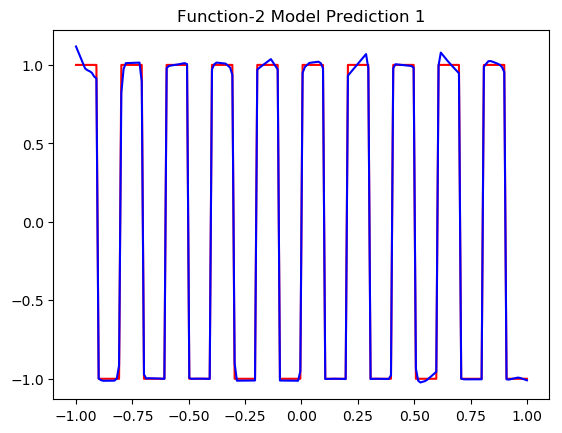

In [23]:
# Plotting original function-2 data in red and Model 1 prediction in blue
plt.plot(x2.numpy(),y2.numpy(),color="red") # plot original data
plt.plot(x2,F2M1prediction.data.numpy(),color="blue") # plot prediction
plt.title('Function-2 Model Prediction 1') # add plot title
plt.show() # show plot


In [24]:
# Re-initializing the second model for Function 2
f2m2 = M2()

# Defining the optimizer
optimizer = torch.optim.Adam(f2m2.parameters(), lr=0.009, weight_decay=1e-4)

# Defining the loss function
loss_func = torch.nn.MSELoss() # Mean Squared Error loss for regression

# Training the second model for Function 2
F2M2epoch_arr, F2M2loss_arr, F2M2prediction = trainFunc(f2m2, x2, y2)


Max Epoch Reacheds = 0.5265


In [25]:
# Getting weights & bias for Model 2 after training for Function 2
print("\nModel 2 weight and bias after training for F2\n")
for param in f2m2.state_dict():
    print(param, "\t",f2m2.state_dict()[param])



Model 2 weight and bias after training for F2

hidden1.weight 	 tensor([[-0.7373],
        [-1.5978],
        [-1.4277],
        [-0.6054],
        [-1.3282],
        [ 0.0163],
        [-0.0395],
        [ 1.4274],
        [-0.8315],
        [ 1.7957]])
hidden1.bias 	 tensor([ 0.6710, -0.7857,  1.2985,  0.4913, -0.0525, -0.0425, -0.0366,  1.2452,
         0.7381, -0.0275])
hidden2.weight 	 tensor([[ 3.2534e-01, -2.5532e+00,  2.3848e-01,  2.4158e-02, -5.9162e-01,
         -1.0774e-02,  3.3632e-03, -2.2304e-01,  3.8477e-01, -3.3228e-01],
        [ 3.8302e-01,  4.3587e-01,  4.8064e-01,  2.3366e-01,  7.2523e-01,
          1.7729e-02, -3.5516e-03,  7.9756e-01,  4.4215e-01, -1.9717e-01],
        [ 2.7280e-01, -3.8756e-01,  3.6468e-01,  2.8827e-01, -2.1049e+00,
         -6.7226e-03, -5.3457e-04,  9.1194e-02,  3.8833e-01, -4.6338e-01],
        [ 1.2873e-01, -5.0264e-01,  2.9255e-01,  3.5754e-01, -3.9644e-01,
         -4.3753e-02,  6.2264e-03, -1.3805e+00,  5.1433e-01, -6.1630e-02],
        [

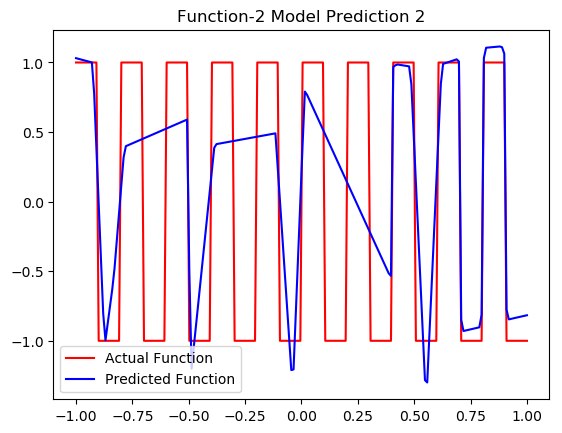

In [26]:
# Plotting the actual function and the predicted function
plt.plot(x2.numpy(),y2.numpy(),color="red", label="Actual Function")
plt.plot(x2,F2M2prediction.data.numpy(),color="blue", label="Predicted Function")
plt.title('Function-2 Model Prediction 2')
plt.legend()  # adding legend to show difference between actual and predicted functions
plt.show()


In [27]:
# This line creates an instance of the M3 class and stores it in the variable "f2m3". 
# This effectively re-initializes the network.
f2m3 = M3()     

# This line creates an Adam optimizer with a learning rate of 0.009 and weight decay of 1e-4, 
# and uses it to optimize the parameters of the network stored in "f2m3".
optimizer = torch.optim.Adam(f2m3.parameters(), lr=0.009, weight_decay = 1e-4)

# This line creates a mean squared loss function, which is used as the loss function during training.
loss_func = torch.nn.MSELoss() 

# This line calls the "trainFunc" function, passing in the variables "f2m3", "x2", and "y2". 
# It stores the results in the variables "F2M3epoch_arr", "F2M3loss_arr", and "F2M3prediction".
F2M3epoch_arr,F2M3loss_arr,F2M3prediction = trainFunc(f2m3,x2,y2)


Max Epoch Reacheds = 0.2633


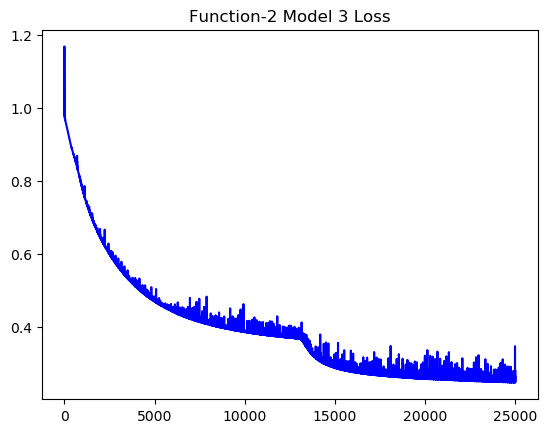

In [28]:
# Plot the loss over the number of epochs for Function-2 Model 3
plt.plot(F2M3epoch_arr, F2M3loss_arr, color="blue")
# Set the title for the plot
plt.title('Function-2 Model 3 Loss')
# Show the plot
plt.show()

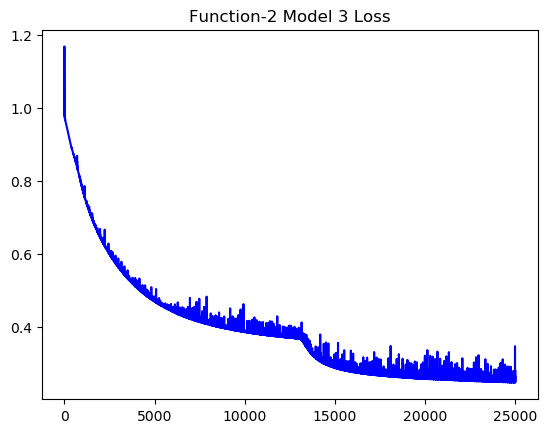

In [29]:
# This line plots the values stored in "F2M3epoch_arr" on the x-axis and "F2M3loss_arr" on the y-axis, 
# using a blue line to connect the points.
plt.plot(F2M3epoch_arr,F2M3loss_arr,color="blue")

# This line sets the title of the plot to "Function-2 Model 3 Loss".
plt.title('Function-2 Model 3 Loss')

# This line displays the plot.
plt.show()


In [30]:
# This line prints a string indicating that we are about to display the weight and bias values for Model 3.
print("\nModel 3 weight and bias after training for F2\n")

# This line iterates over the parameters stored in "f2m3.state_dict()".
for param in f2m3.state_dict():
    # For each parameter, this line prints the name of the parameter and its value.
    print(param, "\t",f2m3.state_dict()[param])



Model 3 weight and bias after training for F2

hidden1.weight 	 tensor([[ 6.0069e-01],
        [ 4.6496e+00],
        [ 4.4701e-02],
        [-1.2300e+00],
        [-2.6342e+00],
        [-2.1373e+00],
        [-2.3600e+00],
        [-2.0507e+00],
        [ 4.9725e-09],
        [-1.8558e-05],
        [-1.6176e+00],
        [ 3.3171e+00],
        [-2.5223e-07],
        [ 1.8832e+00],
        [-2.4858e+00],
        [-2.2497e+00],
        [-1.6649e+00],
        [-1.7200e+00],
        [ 1.8306e+00],
        [ 2.0872e+00],
        [-3.0751e+00],
        [ 7.1581e-12],
        [ 3.2209e+00],
        [-2.7788e+00],
        [ 1.2562e-09],
        [-2.4263e+00],
        [-2.2878e+00],
        [ 4.3257e-07],
        [ 3.0874e-02],
        [ 1.9631e+00],
        [ 2.0979e-05],
        [-1.4241e-17],
        [-1.6881e+00],
        [ 4.3391e-10],
        [ 1.4275e+00],
        [ 4.8919e-02],
        [-3.1090e+00],
        [-1.8555e+00],
        [ 3.4843e+00],
        [-1.9935e-07],
        [ 2.920

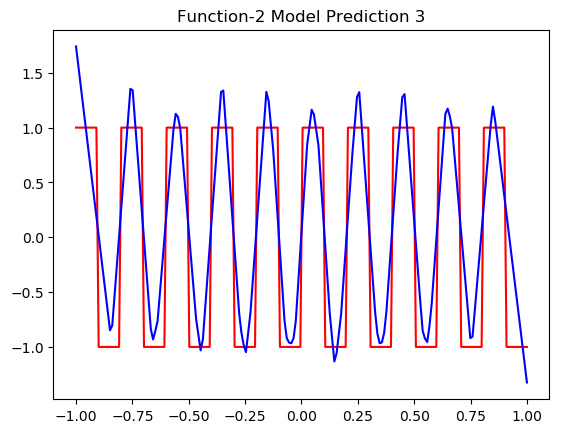

In [31]:
# This line plots the values stored in "x2" on the x-axis and "y2" on the y-axis, using a red line to connect the points.
plt.plot(x2.numpy(),y2.numpy(),color="red")

# This line plots the values stored in "x2" on the x-axis and "F2M3prediction" on the y-axis, using a blue line to connect the points.
plt.plot(x2,F2M3prediction.data.numpy(),color="blue")

# This line sets the title of the plot to "Function-2 Model Prediction 3".
plt.title('Function-2 Model Prediction 3')

# This line displays the plot.
plt.show()


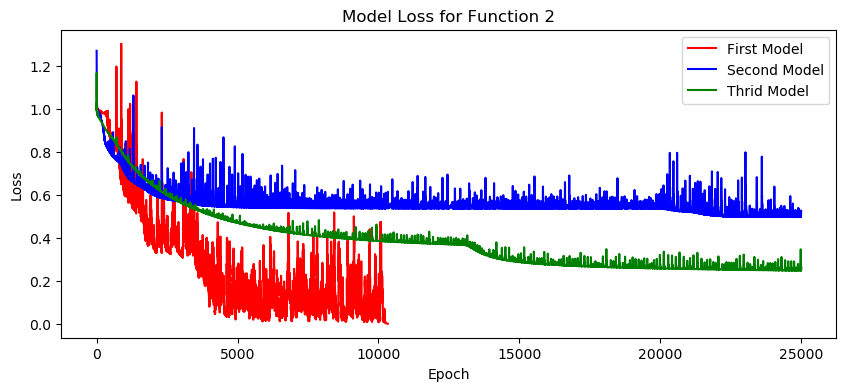

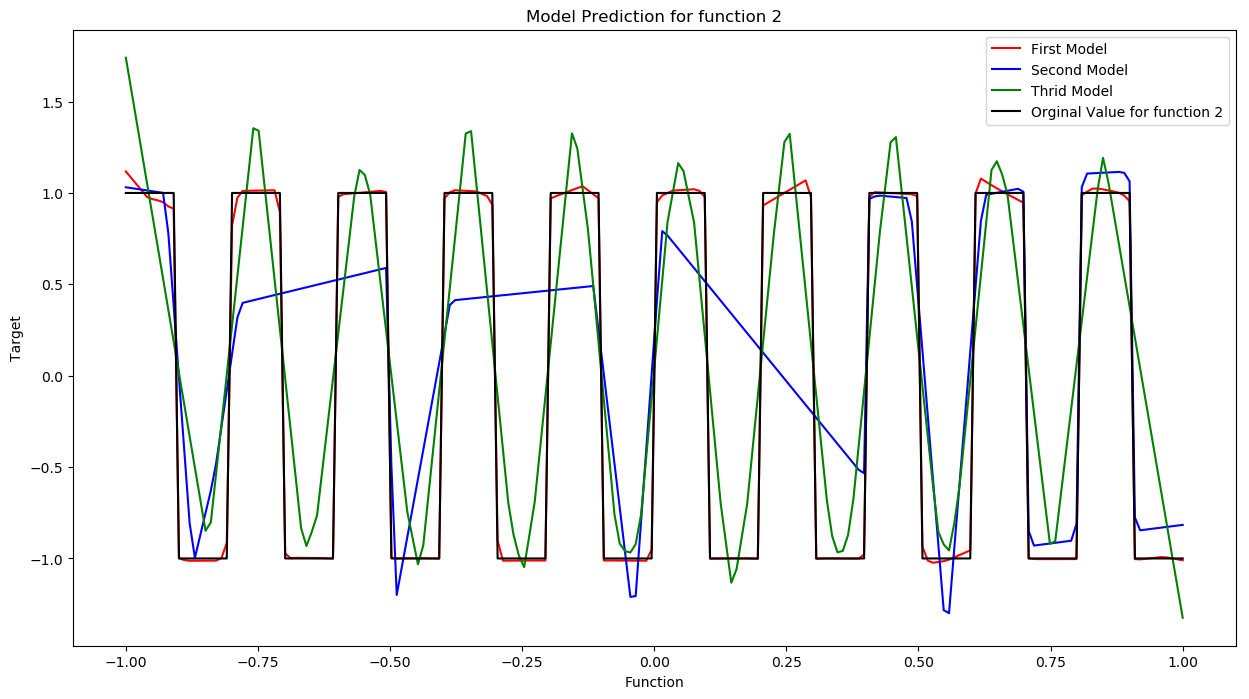

In [32]:
# This line sets the size of the first plot.
plt.figure(figsize=(10,4))

# This line plots the values stored in "F2M1epoch_arr" on the x-axis and "F2M1loss_arr" on the y-axis, using a red line to connect the points.
plt.plot(F2M1epoch_arr,F2M1loss_arr, color = "red")

# This line plots the values stored in "F2M2epoch_arr" on the x-axis and "F2M2loss_arr" on the y-axis, using a blue line to connect the points.
plt.plot(F2M2epoch_arr,F2M2loss_arr, color = "blue")

# This line plots the values stored in "F2M3epoch_arr" on the x-axis and "F2M3loss_arr" on the y-axis, using a green line to connect the points.
plt.plot(F2M3epoch_arr,F2M3loss_arr, color = "green")

# This line sets the title of the plot to "Model Loss for Function 2".
plt.title('Model Loss for Function 2')

# This line adds a legend to the plot, indicating the meaning of each line.
plt.legend(['First Model', 'Second Model','Thrid Model'])

# This line sets the label for the x-axis to "Epoch".
plt.xlabel('Epoch')

# This line sets the label for the y-axis to "Loss".
plt.ylabel('Loss')

# This line saves the plot as an image file named "EpochVSLoss.png".
plt.savefig('EpochVSLoss.png')

# This line displays the plot.
plt.show()

# This line sets the size of the second plot.
plt.figure(figsize=(15,8))

# This line plots the values stored in "x2" on the x-axis and the predictions made by the first model on the y-axis, using a red line to connect the points.
plt.plot(x2,F2M1prediction.data.numpy(),color="red")

# This line plots the values stored in "x2" on the x-axis and the predictions made by the second model on the y-axis, using a blue line to connect the points.
plt.plot(x2,F2M2prediction.data.numpy(),color="blue")

# This line plots the values stored in "x2" on the x-axis and the predictions made by the third model on the y-axis, using a green line to connect the points.
plt.plot(x2,F2M3prediction.data.numpy(),color="green")

# This line plots the values stored in "x2" on the x-axis and the actual values of "y2" on the y-axis, using a black line to connect the points.
plt.plot(x2,y2.numpy(),color="black")

# This line sets the title of the plot to "Model Prediction for function 2".
plt.title('Model Prediction for function 2')

plt.legend(['First Model', 'Second Model','Thrid Model','Orginal Value for function 2'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_Prediction.png')
plt.show()
